# Lecture 7 - Maximum Likelihood Estimation (MLE), Maximum A Posteriori (MAP) & Conjugate Priors

---

# Maximum Likelihood Estimation (MLE) & Maximum A Posteriori (MAP)

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

In **Maximum Likelihood Estimation** (also referred to as **MLE**) we want to *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{t}|\mathbf{y}(\mathbf{x};\mathbf{w}))$. We want to find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

* MLE focuses on maximizing the data likelihood, which *usually* provides a pretty good estimate

* A common trick to maximize the data likelihood is to maximize the log likelihood

* MLE is purely data driven 

* MLE works best when we have lots and lots of data

* MLE will likely overfit when we have small amounts of data or, at least, becomes unreliable

* It estimates relative frequency for our model parameters. Therefore it needs incredibly large amounts of data (infinite!) to estimate the true likelihood parameters
    * This is a problem when we want to make inferences and/or predictions outside the range of what the training data has learned

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

In **Maximum A Posteriori** (also referred as **MAP**) we want to *find the set of parameters* that **maximize** the posterior probability $P(\mathbf{w}|\mathbf{t})$. We want to find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of given some prior beliefs.

* MAP focuses on maximizing the posterior probability - data  likelihood with a prior

* A common trick to maximize the posterior probability is to maximize the log likelihood

* MAP is data driven 

* MAP is mostly driven by the prior beliefs

* MAP works great with small amounts of data *if* our prior was chosen well

* We need to assume and select a distribution for our prior beliefs
    * A wrong choice of prior distribution can impact negatively our model estimation
    
* When we have lots and lots of data, the data likelihood will take over and the posterior will depend less and less on the prior

___

## Illustration Example

**Suppose you flip a coin 3 times. Let $H_i$ be the event that we observe Heads on flip $i$. Consider the event $E=H_1\cap H_2\cap H_3$, i.e. all flips were Heads. What is the probability that the next flip is Heads?**

From classical probability (frequentist), we look only at data to compute the probability of flipping Heads:

\begin{align*}
P(H) = \frac{\text{No. of observed Heads}}{\text{No. of flips}} = \frac{3}{3} = 1
\end{align*}

From Bayesian statistics, we use Bayesian inferencing: What is the **hidden state** in this problem?

* Hidden state: what type of coin was use in the experiment
* Let's assume that we think only two types of coins could have been used, one fair coin and one 2-headed coin. So, by the **Law of Total Probability**:

\begin{align*}
P(H) = P(H|\text{fair})P(\text{fair}) + P(\overline{H}|\text{2-headed})P(\text{2-headed})
\end{align*}

Furthermore, we can test different hypothesis by checking which hypothesis has the largest posterior probability value, e.g. if $P(\text{fair}|E) > P(\text{2-headed}|E)$, then hypothesis "fair" is more likely and that is what we will use to make predictions.
    
Note that the events $H_i$ are **conditionally independent**, that is: $P(H_1\cap H_2|\text{fair}) = P(H_1|\text{fair})P(H_2|\text{fair})$.

## MLE and MAP Solutions

Let's assign heads to the numerical value 1 and tails to 0. The sample space is $S=\{0,1\}$. Let $X$ be the discrete random variable (R.V.) that describes the outcome of flipping a coin. Furthermore, let the probability of heads ($x=1$) be equal to some *unknown* value $\mu$. The probability mass function (pmf) of this R.V. is defined as:

\begin{align*}
p(x|\mu) = \begin{cases} \mu & \text{if } x=1 \\ 1-\mu & \text{if }x=0\\ 0 & \text{otherwise}  \end{cases}
\end{align*}

* This is the **Bernoulli** discrete R.V.. The mean and variance (1st and 2nd moment) of the Bernoulli distribution are: $E[x] = \mu$ and $E[\left(x- E[x]\right)^2] = \mu(1-\mu)$.

* So, for every outcome of the event $E$, we will model it using a Bernoulli distribution, and each outcome is pairwise **conditionally independent**. Therefore, we have the event $E$ contains i.i.d. outcomes.

### Maximum Likelihood (MLE) Estimator

For simplicity of calculation, let $E=x_1\cap x_2\cap \dots\cap x_N$, where $x_i=\{0,1\}$ (0 for Tails and 1 for Heads). Then, for an experiment with $N$ samples, we can write the **data likelihood** as:

\begin{align*}
P(\mathbf{x}|\mu) &= P(x_1\cap x_2\cap \dots\cap x_N|\mu) \\
&= P(x_1|\mu)P(x_2|\mu)\dots P(x_N|\mu) \\
&= \prod_{n=1}^N p(x_n|\mu) \\
&= \prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}
\end{align*}

Now, we are interested in finding the value of $\mu$ given a set of samples $\mathbf{x}=\{x_i\}_{i=1}^N$. 

To optimize the data likelihood, we can apply the natural logarithm function to simplify:

\begin{align*}
arg_\mathbf{\mu} \max P(\mathbf{x}|\mu) &= \arg_\mathbf{\mu} \max \ln \left( P(\mathbf{x}|\mu) \right)
\end{align*}

where

\begin{align*}
\mathcal{L} &= \ln \left( P(\mathbf{x}|\mu) \right) = \sum_{n=1}^N \left(x_n \ln(\mu) + (1-x_n)\ln(1-\mu)\right)
\end{align*}

So now we can take the derivative of this function with respect to (w.r.t.) $\mu$ and equal it to zero:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu} &= 0\\
(1-\mu)\sum_{n=1}^N x_n - \mu \left(N - \sum_{n=1}^N x_n\right) &= 0 \\
\sum_{n=1}^N x_n - \mu\sum_{n=1}^N x_n - \mu N + \mu\sum_{n=1}^N x_n &= 0 \\
\sum_{n=1}^N x_n - \mu N &= 0 \\
\mu_{\text{MLE}} &= \frac{1}{N} \sum_{n=1}^N x_n
\end{align*}

As expected, the MLE estimation for the probability of seeing heads in the next coin flip is equal to the **relative frequency** of the outcome heads.

* Suppose you flipped the coin only once, and saw Tails. The probability of flipping Heads according to MLE would be 0.

* MLE is **purely data driven**! This is sufficient *when* we have lots and lots of data.

### Maximum A Posteriori (MAP) Estimator

In the MAP estimation of $\mu$, we are instead optimizing the posterior probability:

\begin{align*}
&\arg_{\mu} \max P(\mu|\mathbf{x}) \\
=& \arg_{\mu} \max \frac{P(\mathbf{x}|\mu) P(\mu)}{P(\mathbf{x})} \\
\propto & \text{  } \arg_{\mu} \max P(\mathbf{x}|\mu) P(\mu), P(\mathbf{x})\text{ is some constant value} 
\end{align*}

We have defined the data likelihood $P(\mathbf{x}|\mu)$, we now need to choose a **prior distribution** $P(\mu)$.

* This prior distribution will *encode* any prior knowledge we have about the hidden sate of the problem, in this case, the type of coin that was used.

Let's say our **prior distribution** is the Beta Distribution. The Beta Distribution takes the form:

\begin{align*}
\text{Beta}(x|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}
\end{align*}

where $\Gamma(x) = (x-1)!$ and $\alpha,\beta>0$.

The mean and variance of the Beta distribution are: $E[x] = \frac{\alpha}{\alpha+\beta}$ and $E[(x-E[x])^2] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$.

* Let's see what that looks like:

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

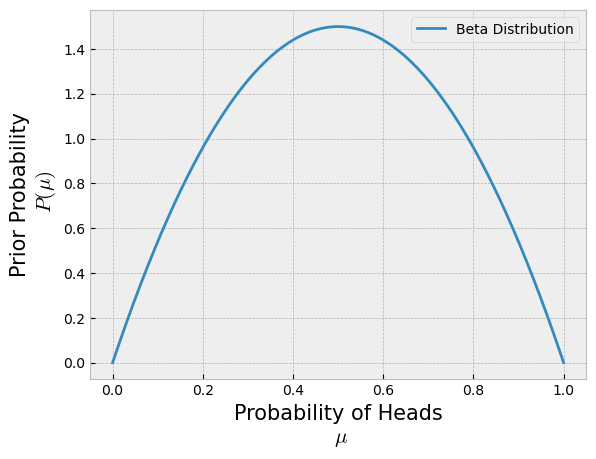

In [10]:
a = 2 #alpha
b = 2 #beta
x = np.arange(0,1,0.0001)
Beta = (math.gamma(a+b)/(math.gamma(a)*math.gamma(b)))*x**(a-1)*(1-x)**(b-1)

plt.plot(x, Beta, label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Probability\n $P(\mu)$',fontsize=15);

Using the Beta Distribution as out prior, we have:

\begin{align*}
P(\mu|\alpha,\beta) &= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&\propto \mu^{\alpha-1} (1-\mu)^{\beta-1}
\end{align*}

Let:
* $m$ the number of heads
* $l$ the number of tails
* $N=m+l$ the total number of coin flips 

We can write our **posterior probability** as:

\begin{align*}
P(\mu|\mathbf{x}) &= \frac{P(\mathbf{x}|\mu)P(\mu)}{P(\mathbf{x})}\\
&\propto P(\mathbf{x}|\mu)P(\mu)\\
&= \left(\prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}\right) \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^m (1-\mu)^l \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^{m+\alpha-1} (1-\mu)^{l+\beta-1}
\end{align*}

The posterior probability has the same shape as the data likelihood. 

This is a special case called **Conjugate Prior Relationship**, which happens when the posterior has the same form as the prior.

We can now optimize our posterior probability, and we will apply the same trick:

\begin{align*}
\mathcal{L} &= \ln P(\mu|\mathbf{x}) = (m+\alpha-1)\ln(\mu) + (l+\beta-1)\ln(1-\mu)
\end{align*}

We can now *optimize* our posterior probability:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu} = 0 \iff & \frac{m+\alpha-1}{\mu} + \frac{l+\beta-1}{1-\mu} = 0\\
\mu_{\text{MAP}} &= \frac{m+\alpha-1}{m + l + \alpha + \beta -2}
\end{align*}

This is our estimation of the probability of heads using MAP!

* Our estimation for the probability of heads, $\mu$, is going to depend on $\alpha$ and $\beta$ introduced by the prior distribution. We saw that they control the level of certainty as well as the center value.

* With only a few samples, the prior will play a bigger role in the decision, but eventually the data takes over the prior.

---

## Code Implementation

Let's illustrate this example with code:

We saw the example where our input dataset $\{x_i\}_{i=1}^N$ is binary, where $x_i=\{0,1\}, \forall i$. 

For each data sample $x_i$, we modeled its data likelihood as the Bernoulli distribution with parameter $\mu$, i.e.

\begin{align*}
x_i \sim \text{Bernoulli}(\mu)
\end{align*}

Furthermore, we assume that each sample is independent of each other. Hence our dataset is a collection of i.i.d. samples.

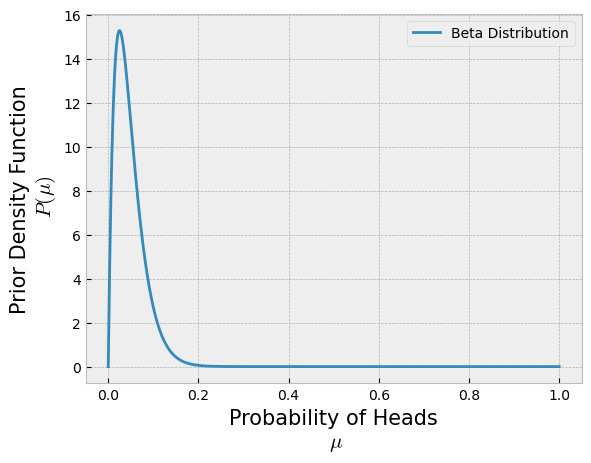

In [13]:
import scipy.stats as stats

## Prior Probability
a = 2
b = 40
Beta = stats.beta(a,b)
x = np.linspace(0,1,1000)

plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);

In [14]:
import scipy.stats as stats

trueMU = 0.5 # 0.5 for a fair coin

Nflips = 10

Outcomes = []
for i in range(Nflips):
    Outcomes += [stats.bernoulli(trueMU).rvs(1)[0]]
    print(Outcomes)
    print('MLE (Frequentist, data-driven): Probability of Heads = ', np.sum(Outcomes)/len(Outcomes))
    print('MAP (Bayesian, uses prior): Probability of Heads = ', (np.sum(Outcomes)+a-1)/(len(Outcomes)+a+b-2))
    input('Press enter to flip the coin again...\n')

[1]
MLE (Frequentist, data-driven): Probability of Heads =  1.0
MAP (Bayesian, uses prior): Probability of Heads =  0.04878048780487805
Press enter to flip the coin again...

[1, 1]
MLE (Frequentist, data-driven): Probability of Heads =  1.0
MAP (Bayesian, uses prior): Probability of Heads =  0.07142857142857142
Press enter to flip the coin again...

[1, 1, 0]
MLE (Frequentist, data-driven): Probability of Heads =  0.6666666666666666
MAP (Bayesian, uses prior): Probability of Heads =  0.06976744186046512
Press enter to flip the coin again...

[1, 1, 0, 1]
MLE (Frequentist, data-driven): Probability of Heads =  0.75
MAP (Bayesian, uses prior): Probability of Heads =  0.09090909090909091
Press enter to flip the coin again...

[1, 1, 0, 1, 0]
MLE (Frequentist, data-driven): Probability of Heads =  0.6
MAP (Bayesian, uses prior): Probability of Heads =  0.08888888888888889
Press enter to flip the coin again...

[1, 1, 0, 1, 0, 1]
MLE (Frequentist, data-driven): Probability of Heads =  0.66

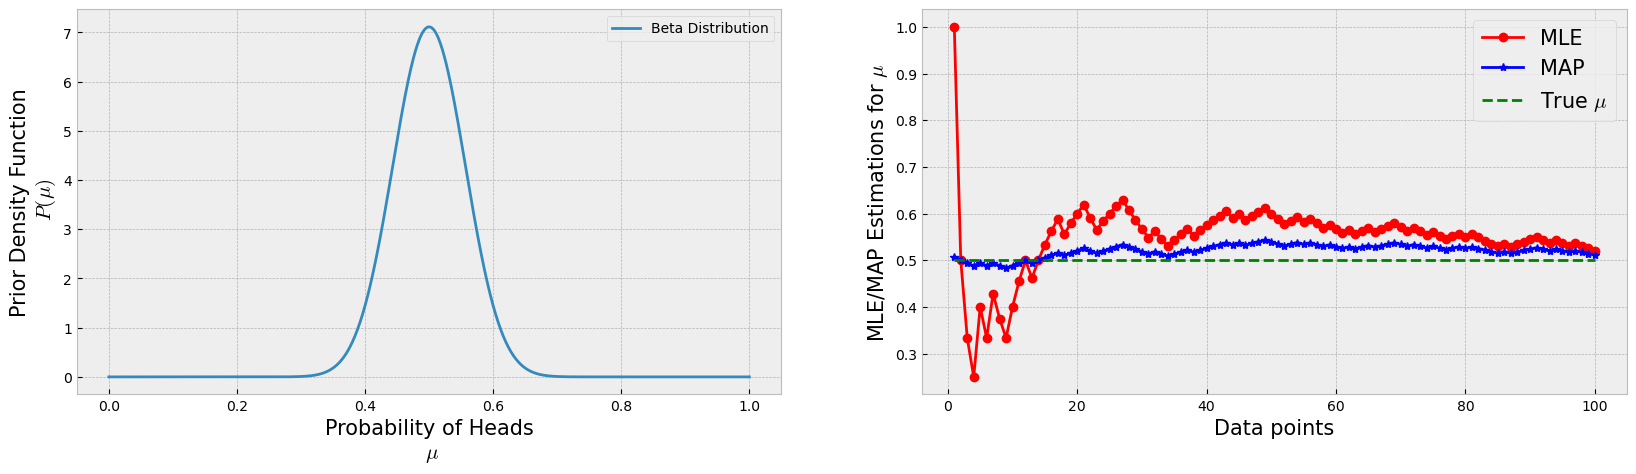

In [24]:
# True value of the unknown parameter
trueMU = 0.5 # 0.5 for a fair coin

# Prior Initial Parameters
a=40 # alpha
b=40 # beta
# Plotting prior
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
Beta = stats.beta(a,b)
x = np.linspace(0,1,1000)
plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);


# Sampling Training Data
Nflips = 100
Outcomes = stats.bernoulli(trueMU).rvs(Nflips)

# Computing MLE and MAP estimates as data is being collected
mu_MLE = []
mu_MAP = []
for i in range(1,Nflips+1):
    mu_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    mu_MAP += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i])+a+b-2)]

# Plotting estimates
plt.subplot(1,2,2)
plt.plot(range(1,Nflips+1), mu_MLE, '-or', label='MLE')
plt.plot(range(1,Nflips+1), mu_MAP, '-*b', label='MAP')
plt.plot(range(1,Nflips+1), [trueMU]*Nflips, '--g', label='True $\mu$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\mu$',size=15)
plt.legend(fontsize=15);

---

# Other Conjugate Priors

There are many conjugate prior relationships, some examples include: 
1. Bernoulli-Beta,
2. Gaussian-Gaussian, 
3. Gaussian-Inverse Wishart,
4. Multinomial-Dirichlet,
5. and others.

The [table of conjugate distributions](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions) is very useful for selecting the prior probability in order to have a conjugate prior relationship for cases when the data likelihood is discrete (such as Bernoulli) or continuous (such as Gaussian).

___

## Could we update the prior as we receive data?

* What if we could fine-tune the prior probability's parameters ($\alpha$ and $\beta$, in this example) as we see more data?

* Could we use the posterior probability to update the prior probability's parameters? That is, to select new values for $\alpha$ and $\beta$ using a data informative prior?

* What cases would make this possible?

---

# Conjugate Priors

Two distributions have a **conjugate prior** relationship when the form of the posterior is the same as the form of the prior.

* Do the **Bernoulli-Beta** distributions have a conjugate prior relationship? Yes!

Note that the posterior probability was defined as:

\begin{align*}
P(\mu|\mathbf{x}) &\propto \mu^{\sum_{i=1}^N x_i+\alpha-1} (1-\mu)^{N-\sum_{i=1}^N x_i+\beta-1}
\end{align*}

and, the prior probability (Beta distribution) is:

\begin{align*}
P(\mu|\alpha, \beta) &\propto \mu^{\alpha-1} (1-\mu)^{\beta-1}
\end{align*}

(In both cases, the constant term was disregarded because it will not affect the solution for $\mu$ during optimization).

The **posterior** and the **prior** probability have the same shape, hence they have a **<font color='blue'>conjugate prior</font>** relationship. Moreover, see that the parameters $\alpha$ and $\beta$ are now mapped to:

\begin{align*}
\alpha^{(t+1)} &\leftarrow \alpha^{(t)} + \sum_{i=1}^N x_i\\
\beta^{(t+1)} &\leftarrow \beta^{(t)} + N - \sum_{i=1}^N x_i
\end{align*}

In an online model estimation scenario, where the posterior has the same form as the prior, we can use the posterior as our new prior. This new prior is now data informative and will update it's parameters based on (1) our initial choice, and (2) the data. 

## Pseudo-Code for Online Update of the Prior

1. Iteration $t=0$
2. Initialize the parameters of the prior probability, $\alpha^{(t)}$ and $\beta^{(t)}$
3. As data comes in:
    1. Compute the posterior probability, $\mathcal{L}_{\text{MAP}}^{(t)} = P(\mathbf{x}|\mu)P(\mu|\alpha^{(t)},\beta^{(t)})$
    2. Make an estimate for the parameter, $\mu_{\text{MAP}}^{(t)}$
    3. Update parameters of prior probability:
    \begin{align*}
    \alpha^{(t+1)} &\leftarrow \alpha^{(t)} + \sum_{i=1}^N x_i\\
    \beta^{(t+1)} &\leftarrow \beta^{(t)} + N - \sum_{i=1}^N x_i
    \end{align*}
    4. $t \leftarrow t + 1$

Let's see how we can implement this in code for this working example:

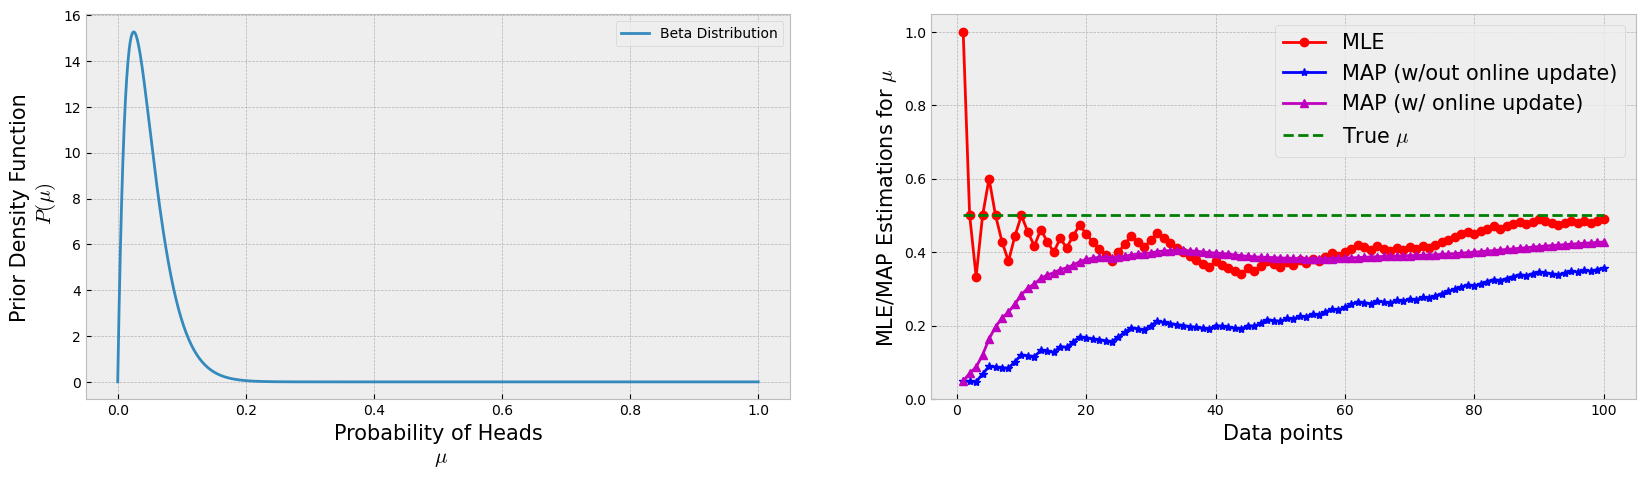

In [22]:
# True value of the unknown parameter
trueMU = 0.5 # 0.5 for a fair coin

# Prior Probability parameters
a = 2; a_init = a
b = 40;  b_init = b
# Plotting prior
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
Beta = stats.beta(a_init,b_init)
x = np.linspace(0,1,1000)
plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);

# Sampling Training Data
Nflips = 100
Outcomes = stats.bernoulli(trueMU).rvs(Nflips)

# Computing MLE and MAP estimates as data is being collected
mu_MLE = []
mu_MAP = []
mu_MAP_update = []
for i in range(1,Nflips+1):
    mu_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    mu_MAP += [(np.sum(Outcomes[:i])+a_init-1)/(len(Outcomes[:i])+a_init+b_init-2)]
    mu_MAP_update += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i])+a+b-2)]
    a += np.sum(Outcomes[:i])
    b += len(Outcomes[:i]) - np.sum(Outcomes[:i])

# Plotting estimates
plt.subplot(1,2,2)
plt.plot(range(1,Nflips+1), mu_MLE, '-or', label='MLE')
plt.plot(range(1,Nflips+1), mu_MAP, '-*b', label='MAP (w/out online update)')
plt.plot(range(1,Nflips+1), mu_MAP_update, '-^m', label='MAP (w/ online update)')
plt.plot(range(1,Nflips+1), [trueMU]*Nflips, '--g', label='True $\mu$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\mu$',size=15)
plt.legend(fontsize=15);

## Let's now see the effects on the posterior probability

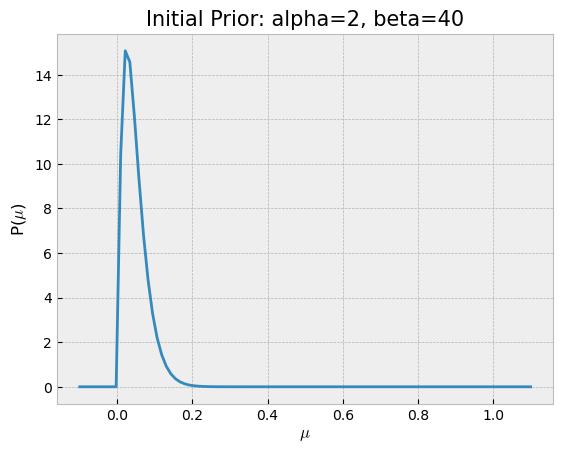

Alpha =  2
Beta =  40


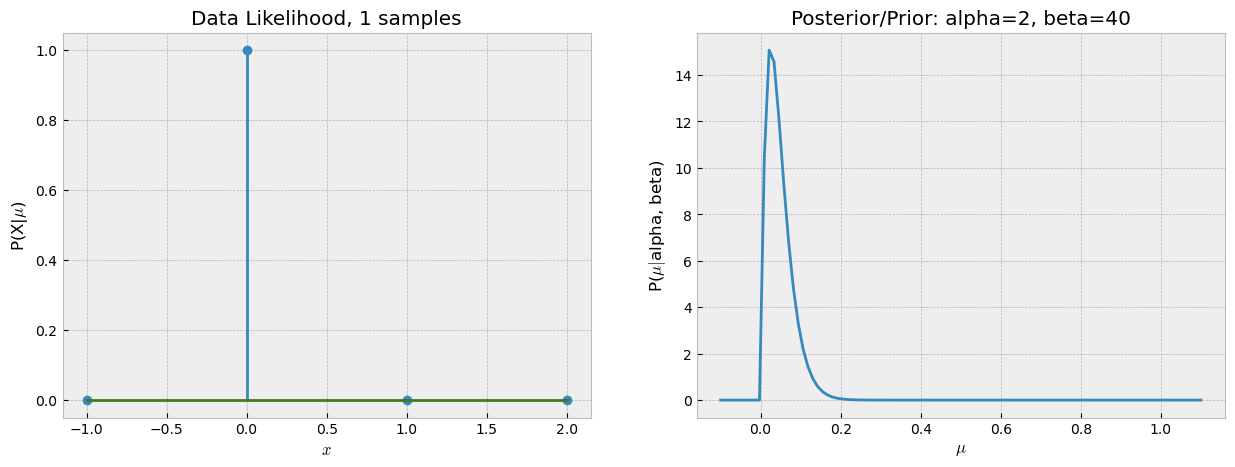

Number of samples:  1
Data:  [0]
MAP estimate mu =  0.024390243902439025
New alpha =  2
New beta =  41


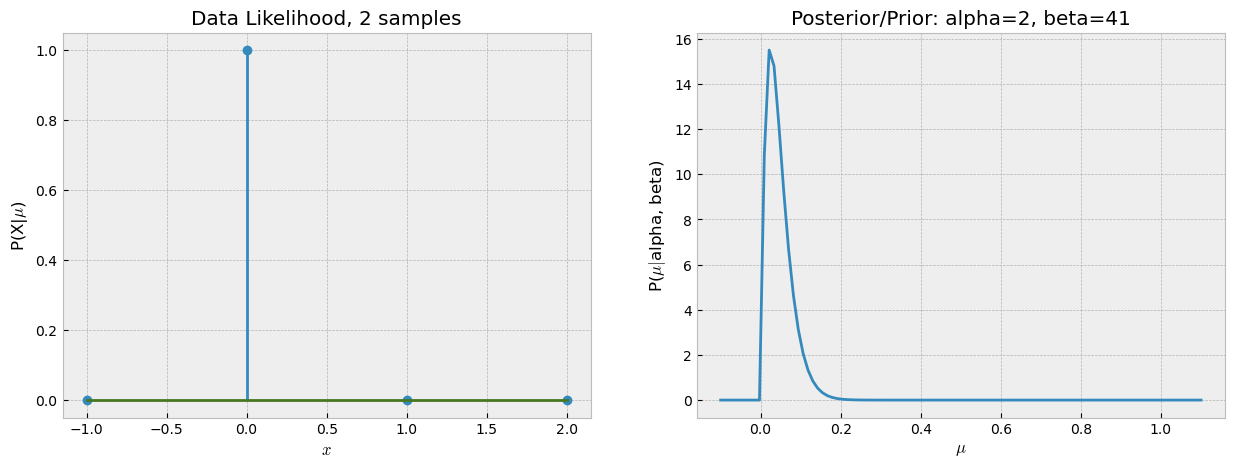

Number of samples:  2
Data:  [0 0]
MAP estimate mu =  0.023255813953488372
New alpha =  2
New beta =  43


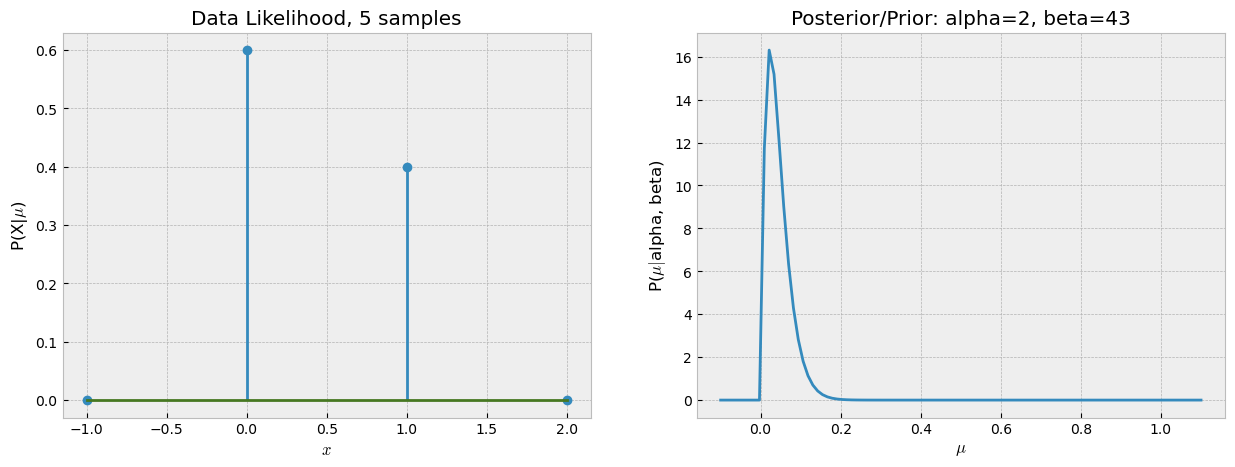

Number of samples:  5
Data:  [0 0 1 0 1]
MAP estimate mu =  0.0625
New alpha =  4
New beta =  46


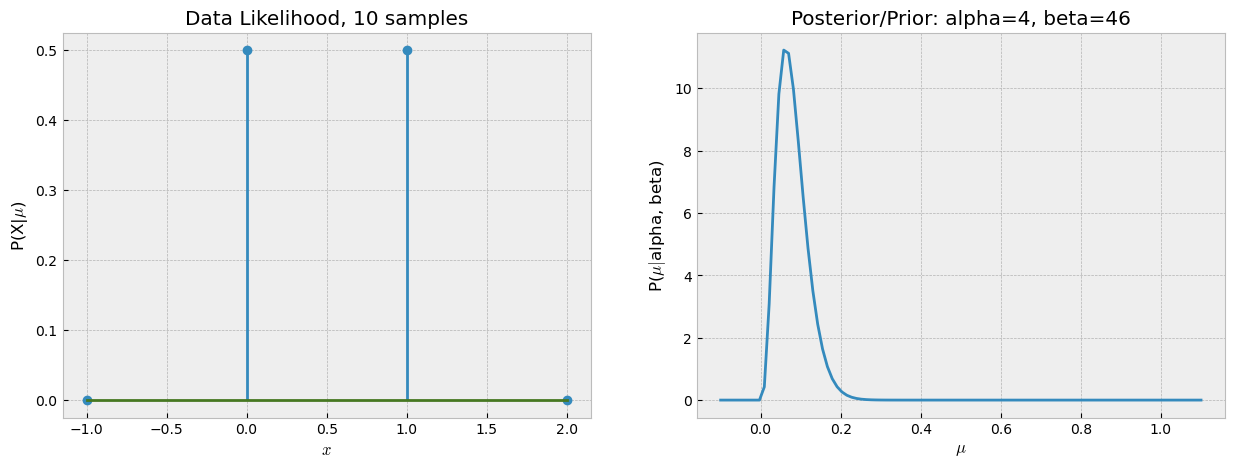

Number of samples:  10
Data:  [0 0 1 0 1 0 1 1 0 1]
MAP estimate mu =  0.13793103448275862
New alpha =  9
New beta =  51


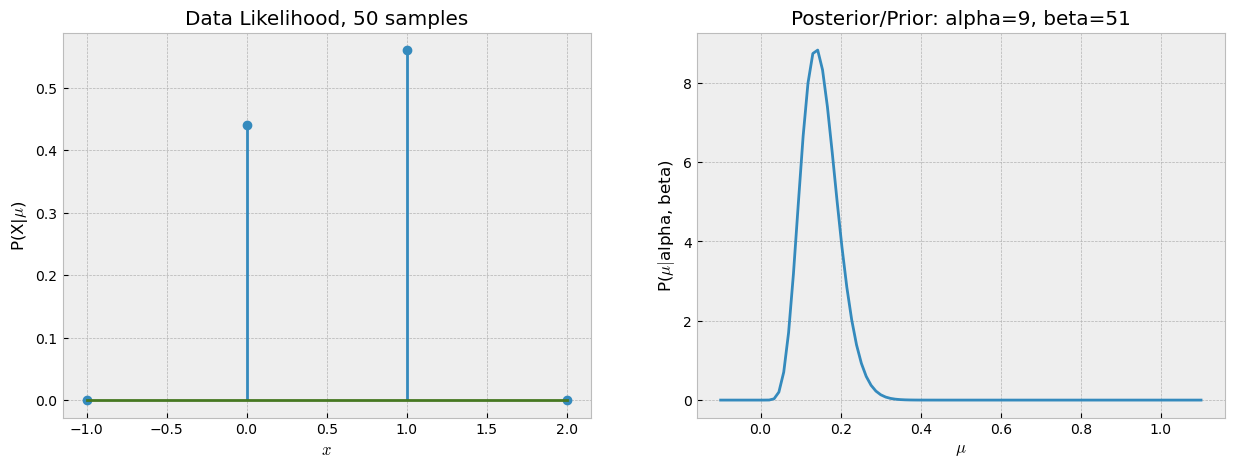

Number of samples:  50
Data:  [0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 1 0]
MAP estimate mu =  0.3333333333333333
New alpha =  37
New beta =  73


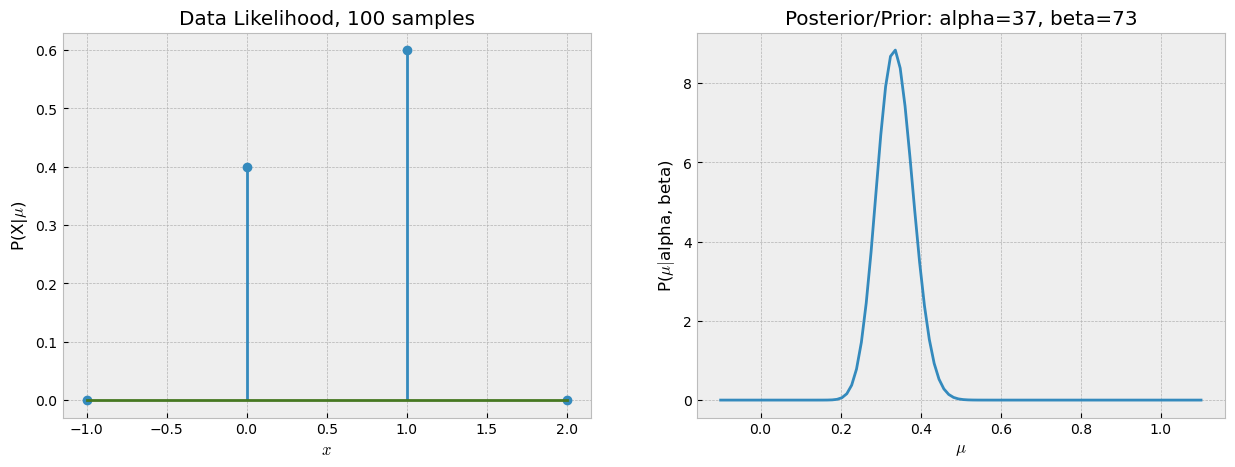

Number of samples:  100
Data:  [0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1]
MAP estimate mu =  0.46153846153846156
New alpha =  97
New beta =  113


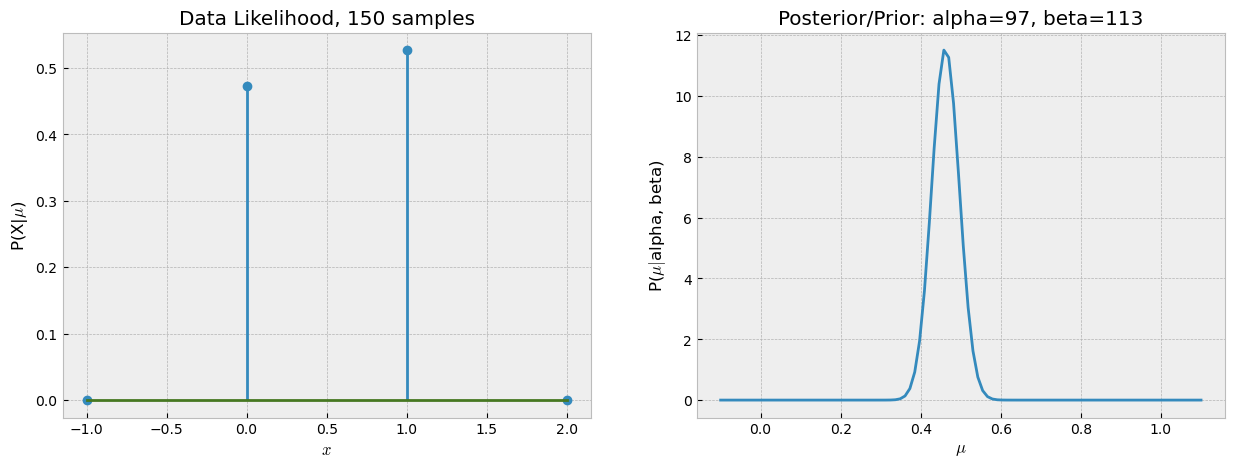

Number of samples:  150
Data:  [0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1
 0 1]
MAP estimate mu =  0.4888268156424581
New alpha =  176
New beta =  184


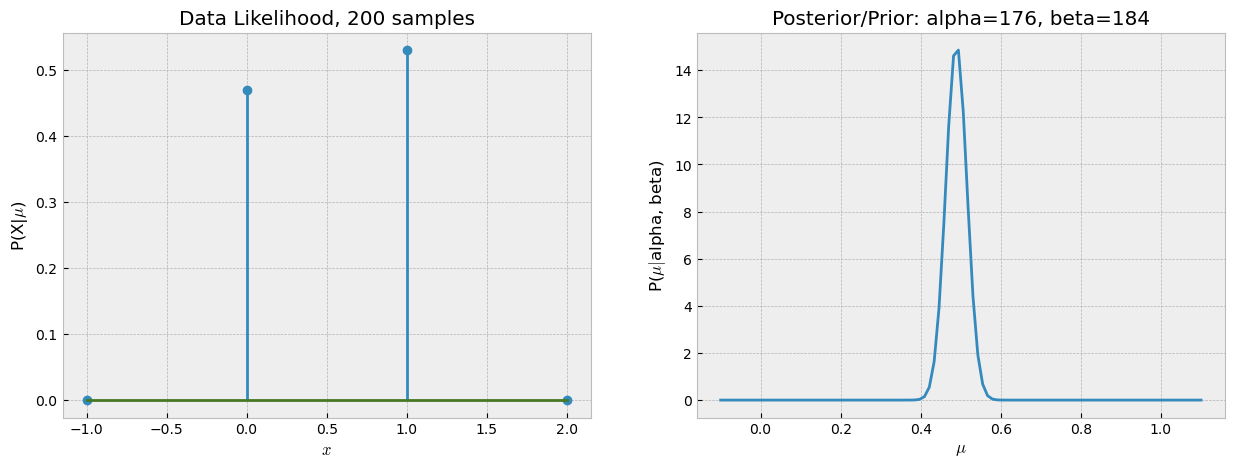

Number of samples:  200
Data:  [0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0]
MAP estimate mu =  0.503584229390681
New alpha =  282
New beta =  278


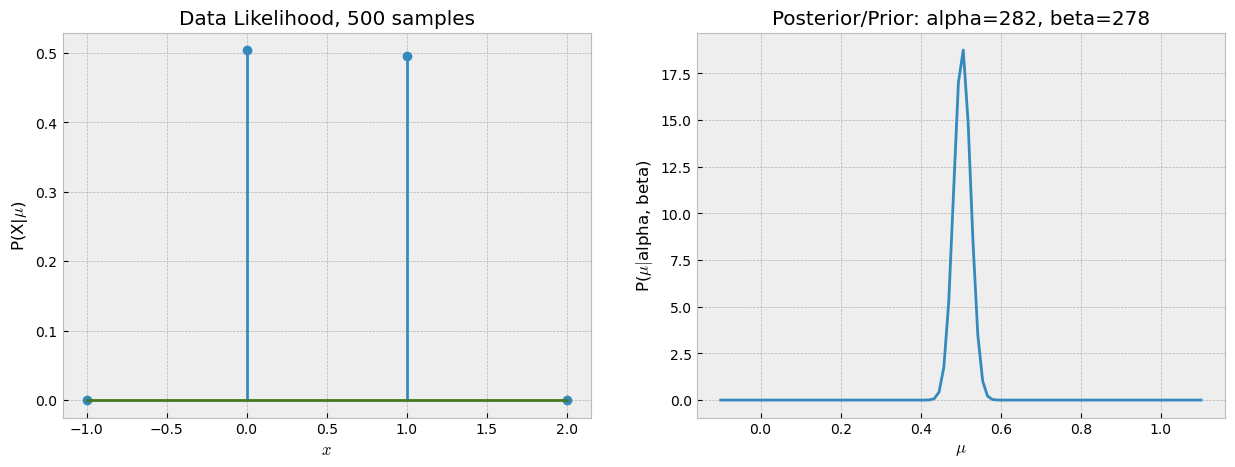

Number of samples:  500
Data:  [0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1
 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 

In [23]:
# True value of the unknown parameter
trueMU = 0.5 # 0.5 for a fair coin

# Prior Probability parameters
a = 2; a_init = a
b = 40;  b_init = b

# Plotting data
x = np.linspace(-0.1,1.1,100)
xr = range(-1,3)

# Prior probability, Beta(a,b)
plt.plot(x, stats.beta(a,b).pdf(x))
plt.xlabel('$\mu$'); plt.ylabel('P($\mu$)')
plt.title('Initial Prior: alpha='+str(a)+', beta='+str(b),size=15)
plt.show();

print('Alpha = ', a)
print('Beta = ', b)

Nsamples = [1,2,5,10,50,100,150,200,500]
Outcomes = stats.bernoulli(trueMU).rvs(size=Nsamples[-1])
for i in range(len(Nsamples)):
    Data = Outcomes[:Nsamples[i]]
    
    # Outcomes will have 1's or 0's (1 - Heads, 0 - Tails) 
    estimate_mu = (np.sum(Data)+a-1)/(len(Data)+a+b-2)
    
    # Data Likelihood:
    fig=plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.stem(xr, stats.bernoulli(np.sum(Data)/len(Data)).pmf(xr))
    plt.xlabel('$x$'); plt.ylabel('P(X|$\mu$)'); 
    plt.title('Data Likelihood, '+str(Nsamples[i])+' samples')
    
    # Posterior/Prior:
    fig.add_subplot(1,2,2)
    plt.plot(x, stats.beta(a,b).pdf(x))
    plt.xlabel('$\mu$'); plt.ylabel('P($\mu|$alpha, beta)'); 
    plt.title('Posterior/Prior: alpha='+str(a)+', beta='+str(b))
    plt.show()
    
    # Update Prior distribution
    a += np.sum(Data)
    b += len(Data)-np.sum(Data)
    
    # Print estimate for mu
    print('Number of samples: ', len(Data))
    print('Data: ',Data)
    print('MAP estimate mu = ', estimate_mu)
    print('New alpha = ', a)
    print('New beta = ', b)

___

# Other Conjugate Priors

There are many conjugate prior relationships, some examples include: 
1. Bernoulli-Beta,
2. Gaussian-Gaussian, 
3. Gaussian-Inverse Wishart,
4. Multinomial-Dirichlet,
5. and others.

The [table of conjugate distributions](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions) is very useful for selecting the prior probability in order to have a conjugate prior relationship for cases when the data likelihood is discrete (such as Bernoulli) or continuous (such as Gaussian).

___

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

$$\arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})$$

In **Maximum Likelihood Estimation** we *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{t}|\mathbf{w})$. We find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

* MLE focuses on maximizing the data likelihood, which *usually* provides a pretty good estimate

* A common trick to maximize the data likelihood is to maximize the log likelihood

* MLE is purely data driven 

* MLE works best when we have lots and lots of data

* MLE will likely overfit when we have small amounts of data or, at least, becomes unreliable

* It estimates relative frequency for our model parameters. Therefore it needs incredibly large amounts of data (infinite!) to estimate the true likelihood parameters
    * This is a problem when we want to make inferences and/or predictions outside the range of what the training data has learned

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

\begin{align*}
& \arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})P(\mathbf{w}) \\ 
& \propto \arg_{\mathbf{w}} \max P(\mathbf{w}|\mathbf{t})
\end{align*}

In **Maximum A Posteriori** we *find the set of parameters* that **maximize** the the posterior probability $P(\mathbf{w}|\mathbf{t})$. We find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of.

* MAP focuses on maximizing the posterior probability - data  likelihood with a prior

* A common trick to maximize the posterior probability is to maximize the log likelihood

* MAP is data driven 

* MAP is mostly driven by the prior beliefs

* MAP works great with small amounts of data *if* our prior was chosen well

* We need to assume and select a distribution for our prior beliefs
    * A wrong choice of prior distribution can impact negatively our model estimation
    
* When we have lots and lots of data, the data likelihood will take over and the posterior will depend less and less on the prior

___